## Supervised learning
### Logistic regression

- Output is discrete, hence a classifier.  Yes or No. Or could be more than 2 choices.


• Suppose, data x ∈ Rd and binary labels y ∈ {−1, 1} 

 "+" - $OR_{+}$, calculate $p_{+}$ 

$$P_w,_b\left(y \mid \textbf{x}\right)   = \frac{1}{1 + \exp^{-y(wx+b)}} $$

 we have the sigmoid function aka, squishing function)
<img src="figures/Logistic-curve.svg"> 
 
#### Maximum-likelihood -
Assumption that data is independently drawn from one distribution (i.i.d.). Then
($x^{(1)}, y^{(1)}), . . . , (x^{(n)}, y^{(n)}) ∈ R^d × \{−1, 1\}$, pick $w ∈ R^d$ and $b ∈ R$ that maximize( i.e. finding parameters that maximize the probability p of event 1 and (1-p) of non-event 0)
$$ \prod_{i=1}^{n} P_w,_b(y^{(i)} \mid  x^{(i)}  ),$$

Take log to get a loss function in sum form
$$ \mathcal{L_w,_b} (\textbf w, \textbf{b}) = \sum_{i=1}^{n} \ln (1 + \exp^{-y^{(i)}(\textbf{w}\textbf{x}^{(i)}+\text{b})})$$



### Why Logistic vs Linear regression?
<img src="figures/log_linear.png">

- Higher errors at the middle values vs the end values (distance from the point to the linear regression line)
- Predictions at the end values will not be useful, i.e. outside of the range 0 to 1.



In [3]:
import pandas as pd

#credit score data example
credit_df = pd.read_csv('data/credit_scoring_sample.csv')
credit_df.head()


,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [83]:
credit_df.isnull().sum()
#credit_df.count() #45063

SeriousDlqin2yrs                           0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
MonthlyIncome                           8643
NumberOfDependents                      1117
dtype: int64

In [84]:
credit_df=credit_df.dropna()
credit_df.count()

SeriousDlqin2yrs                        36420
age                                     36420
NumberOfTime30-59DaysPastDueNotWorse    36420
DebtRatio                               36420
NumberOfTimes90DaysLate                 36420
NumberOfTime60-89DaysPastDueNotWorse    36420
MonthlyIncome                           36420
NumberOfDependents                      36420
dtype: int64

In [85]:
credit_df.SeriousDlqin2yrs.value_counts()

0    28063
1     8357
Name: SeriousDlqin2yrs, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=credit_df[['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents']]
y=credit_df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify=y)

clf = LogisticRegression()
result=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#score = clf.score(X_test, y_test)
#print(score)

### Evaluation of the model results

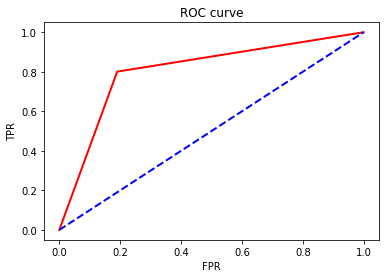

             precision    recall  f1-score   support

          0       0.81      0.98      0.89      9261
          1       0.80      0.22      0.35      2758

avg / total       0.81      0.81      0.76     12019



In [87]:
from sklearn.metrics import roc_curve,confusion_matrix,roc_auc_score
#confusion_matrix(clf.predict(X_test),y_test)
fpr, tpr,_=roc_curve(y_pred,y_test,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
#fpr, tpr, thresholds = roc_curve(y_test, score, pos_label=1)
roc_auc_score(clf.predict(X_test),y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Coefficient of the features in the decision function.

In [88]:
#clf.coef_[0]
coef_DF=pd.DataFrame(data={'Variable':list(X_test),'value':(clf.coef_[0])})
coef_DF
#coef_DF_standardised=pd.DataFrame(data={'Variable':list(X_test),'value':(clf.coef_[0])*np.std(X_test,axis=0)/np.std(y_test)})




,Variable,value
0,age,-0.028352
1,NumberOfTime30-59DaysPastDueNotWorse,0.481154
2,DebtRatio,-0.000149
3,NumberOfTimes90DaysLate,0.413242
4,NumberOfTime60-89DaysPastDueNotWorse,0.104051
5,MonthlyIncome,-0.000036
6,NumberOfDependents,0.056647


### Assignment: 
This time, impute the missing values for Monthly Income and NumberOfDependents, refit the logistic regression model and compare your result.  